<a href="https://colab.research.google.com/github/etmaca5/Biology/blob/main/Casanova_Etienne_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Migrations

#### **Please read the following instructions carefully before you continue.**

This template notebook is for Homework 1, due Thursday, April 13th, 2023.

To use this template, click `File` > `Save a copy in Drive`. You now have your own editable copy to which you can add your code. However, before you make changes, note that we've scaffolded this notebook to help get you started:

- We've already written `import` statements for all the modules you should need.
- We provide an introduction that lays out one potential approach for solving the problem, explaining what each logical "chunk" of your code ought to accomplish. You can use this as a starting point for writing your own code.  

Of course, if you'd rather do your own thing, you are not required to follow the path we've laid out, or use the modules we've recommended. However, a few things _are_ required (refer to the [Intro to Colab](https://colab.research.google.com/drive/1fq_HaiuYb1L18uGcoA3eGs6taiUafR-6?usp=sharing) notebook):

- _Literate style._ Dumping everything into a single, monstrous code cell is illegible and unacceptable. Remember to divide your code into reasonable, logical chunks, and to follow up each code cell with a text cell that explains and interprets the results.
- _Comments._ That said, writing "literate" code is not an excuse to avoid writing comments :)
- _Problem labels/numbers._ Please use text cells to clearly label where your solution to one problem ends, and the next begins.

Remember that a human is going to read and grade your notebook, so it is in your best interest to help them understand your work clearly. Your finished solution to a given problem should flow coherently from one code cell to the next. (Our "scaffold" helps you do this!)

If you get stuck, remember that [tutorials](https://bi1.caltech.edu/2023/tutorials) are held in-person each week.

---

In [ ]:
import numpy as np  # numeric computing
import matplotlib.pyplot as plt  # generating plots
import skimage.io  # image reading and manipulation
import skimage.color  # processing color images
import skimage.filters  # filtering images
import skimage.measure  # measuring objects in images
import seaborn as sns  # make plots prettier
sns.set()

---

## Introduction

This week's code problem comes from Question 3, which asks you to count elephants from space! In Part (a), you will develop a simple thresholding algorithm for doing so, and use it on a provided image of elephants gathered around a watering hole. In Part (b), you will simply attempt to detect elephants in a second image and interpret the results, using the same code you wrote in (a).

The approach (which we'll explore in the tutorial) is to threshold based on pixel intensities. Here's a suggested list of steps your code could accomplish, along with modules you may find helpful:

1. Load in an image and view it. (e.g. `skimage.io`, `matplotlib`)
2. Convert the RGB image to grayscale. (e.g. `skimage.color`)
3. Flatten the image and plot a histogram of the pixel intensities. (e.g. `skimage.color`, `matplotlib`)
4. Find an intensity threshold that successfully distinguishes elephants from the background.
  - If you find it difficult to do so cleanly, you may need to "remove" large, high-intensity features by doing a background subtraction. For example, you could apply a Gaussian blur to the image and subtract this from the grayscale original. (e.g. `skimage.filters`)
5. Iterate over each segmented object and exclude any which aren't elephant-sized. (e.g. `skimage.measure`)
6. Finally, plot the original image, but this time with your identified elephants clearly labeled (e.g. boxed/circled/colored).

## Question 3a

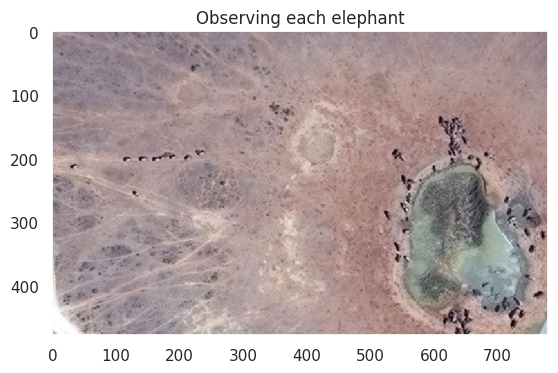

In [ ]:
image = skimage.io.imread("http://rpdata.caltech.edu/courses/bi1_2023/homework/wk1_migrations/elephants_3a.jpg")
plt.grid(False)
plt.title("Observing each elephant")
plt.imshow(image)

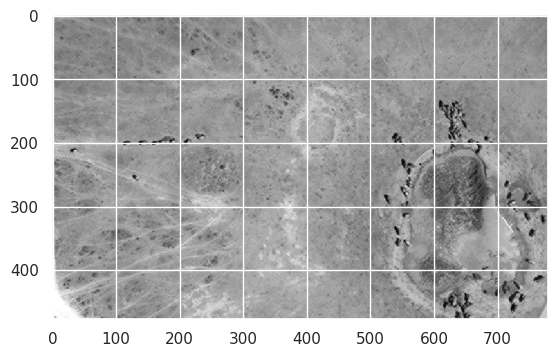

In [ ]:
grayimage = skimage.color.rgb2gray(image)
plt.imshow(grayimage, cmap = 'gray')

Text(0, 0.5, 'pixel count')

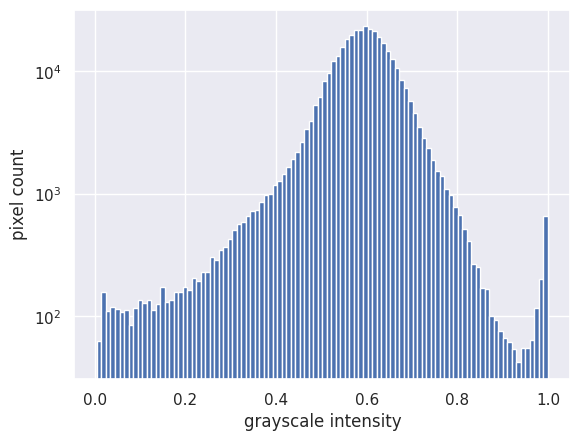

In [ ]:

histogram = plt.hist(grayimage.flatten(), bins=100)
plt.yscale('log')
plt.xlabel('grayscale intensity')
plt.ylabel('pixel count')

Text(0, 0.5, 'pixel count')

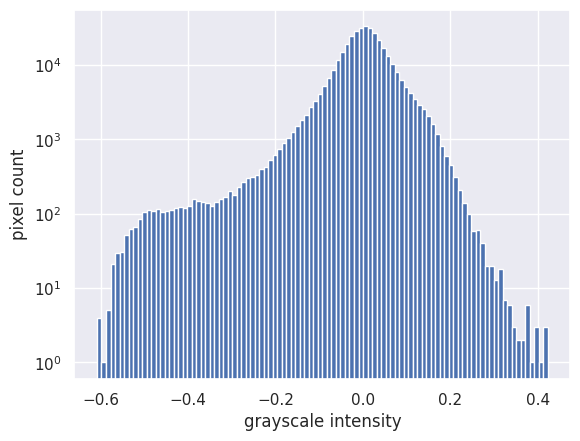

In [ ]:

blurredimg = skimage.filters.gaussian(grayimage, sigma = 25)
subtractedimg = grayimage - blurredimg
histogramtwo = plt.hist(subtractedimg.flatten(), bins=100)
plt.yscale('log')
plt.xlabel('grayscale intensity')
plt.ylabel('pixel count')

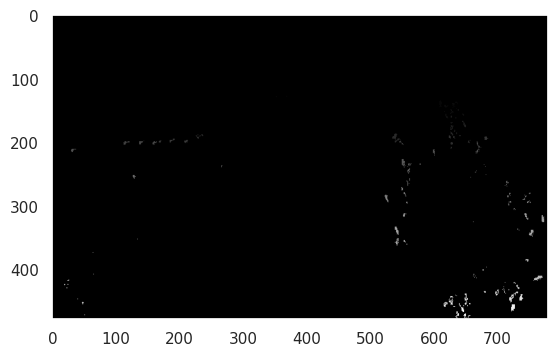

In [ ]:

threshold = -0.4
elephantCandidates = (subtractedimg < threshold)
labeledimg = skimage.measure.label(elephantCandidates)
plt.imshow(labeledimg, cmap = 'gray')
plt.grid(False)

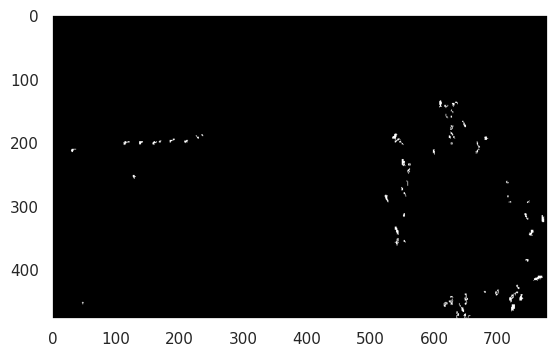

In [ ]:
sizeThreshold = 5
blobs = labeledimg.max()

elephants = np.zeros_like(labeledimg)

for b in range(1, blobs):
  temp = (labeledimg == b)
  if(temp.sum() > sizeThreshold):
    elephants += temp

plt.imshow(elephants, cmap = 'gray')
plt.grid(False)


In [ ]:
cleanElephants = skimage.measure.label(elephants)
cleanElephants.max()

67

The algorithm used to find the elephants is based on the one given in the instructions above. It first grayscales the image, then plots the grayscale pixel intensity in order to help find a range of pixel intensity that matches that of the elephants (logarithmic). After, the image is readjusted with gaussian blur in order to distringuish the pixel intensity of the elephants further. Then, we set a pixel intensity threshold as the maximum brightness that an elephant could have, and any pixels below that brightness are added to a new image. Then we go through each blob of pixels in that new image and create a new threshold, which would represent the size of an elephant. All blobs of that size or more are added to our final image, which captures the location of all the elephants in the original image. The thresholds were tested for until they produced images which accurately obtained the locations of where the elephants were. The accuracy was close, but not perfect, as certain pixels in the image have the same coloring as elephants, making it very difficult to distinguish them. At the end of the code, I print the total number of elephants captured in the final image (done with the number of blobs from before). The main assumption made is that all have a certain size (5 pixels with respect to the image).







## Question 3b

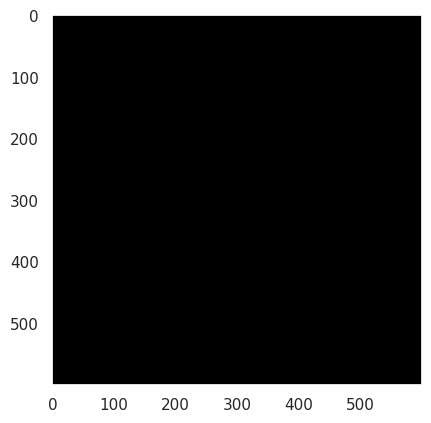

In [ ]:
image = skimage.io.imread("http://rpdata.caltech.edu/courses/bi1_2023/homework/wk1_migrations/elephants_3b.jpg")
grayimage = skimage.color.rgb2gray(image)
blurredimg = skimage.filters.gaussian(grayimage, sigma = 25)
subtractedimg = grayimage - blurredimg
threshold = -0.4
elephantCandidates = (subtractedimg < threshold)
labeledimg = skimage.measure.label(elephantCandidates)
sizeThreshold = 5
blobs = labeledimg.max()

elephants = np.zeros_like(labeledimg)

for b in range(1, blobs):
  temp = (labeledimg == b)
  if(temp.sum() > sizeThreshold):
    elephants += temp

plt.imshow(elephants, cmap = 'gray')
plt.grid(False)

None of the elephants appear, so there is no accuracy whatsoever. The reason for this is most likely because the thresholds in the previous image do not work for this one. In order to obtain an accurate answer we would need to re-do the histogram process in order to obtain the correct pixel brightness threshold then the correct elephant size threshold.

---

### Submission instructions

When you're finished, recall the steps for submitting Colab notebooks:

1. Run all the cells from top-to-bottom, in order (`Runtime` > `Run all`).
2. Once the entire notebook has completed running and the output of all cells is visible, save it (`File` > `Save`).
3. Download the notebook in `.ipynb` format (`File` > `Download` > `Download .ipynb`).
4. Rename the file according to the usual convention (`lastname_firstname_hw#.ipynb`), if you haven't already.
5. Upload the file to Canvas.
